<a href="https://colab.research.google.com/github/hongphuc-pham/treeCatalog/blob/gcolab/TreeClassification_usingModule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import os, sys
## For google colab only
from google.colab import drive
drive.mount('/content/drive')

## on Phuc's drive
%cd /content/drive/MyDrive/Uni/Thesis/Repo/classification/streetview

Mounted at /content/drive
/content/drive/MyDrive/Uni/Thesis/Repo/classification/streetview


# Prepare dataset - DO NOT RUN AGAIN

In [ ]:
# # Set the path to the folder you want to check the size of
# folder_path = '/content/drive/MyDrive/Uni/Thesis/dataset/classification/allPasadenaTreesSorted'

# # Calculate the size of the folder
# import os
# total_size = 0
# for dirpath, dirnames, filenames in os.walk(folder_path):
#     for f in filenames:
#         fp = os.path.join(dirpath, f)
#         total_size += os.path.getsize(fp)

# # Print the size of the folder in bytes, kilobytes, megabytes and gigabytes
# print(f"Size of {folder_path}: {total_size} bytes ({total_size/1024:.2f} KB, {total_size/1024**2:.2f} MB, {total_size/1024**3:.2f} GB)")


time: 593 µs (started: 2023-03-07 04:46:27 +00:00)


In [ ]:
# import os

# lvl1_fldNames = [f.name for f in os.scandir(folder_path) if f.is_dir()]
# lvl1_fldNames

time: 498 µs (started: 2023-03-07 04:46:27 +00:00)


In [ ]:
# streeView_path= '/content/drive/MyDrive/Uni/Thesis/dataset/classification/StreetView'
# aerialView_path = '/content/drive/MyDrive/Uni/Thesis/dataset/classification/Aerial'
# for folder_name in lvl1_fldNames:
#     folder_path = os.path.join(aerialView_path, folder_name)
#     os.makedirs(folder_path, exist_ok=True)

time: 476 µs (started: 2023-03-07 04:46:27 +00:00)


In [ ]:
# import shutil
# ogFld_path = '/content/drive/MyDrive/Uni/Thesis/dataset/classification/allPasadenaTreesSorted'

# for fldName in lvl1_fldNames:
#   lvl2fPth = os.path.join(ogFld_path,fldName,'aerial')
#   target_path = os.path.join(aerialView_path,fldName)
#   for file_name in os.listdir(lvl2fPth):
#     file_path = os.path.join(lvl2fPth, file_name)

#     if os.path.isfile(file_path):
#       shutil.copy(file_path, target_path)

time: 539 µs (started: 2023-03-07 04:46:27 +00:00)


# Install

In [ ]:
!pip install "ray[tune]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 40.7 MB/s eta 0:00:00


In [ ]:
## Time execution tracking
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.7 MB/s eta 0:00:00
time: 490 µs (started: 2023-03-21 04:14:00 +00:00)


# Loading modules

In [ ]:
sys.path.append('/content/drive/MyDrive/Uni/Thesis/Repo/modules/pyTorchTraining')
from pyTorchTraining import *

time: 6.36 s (started: 2023-03-21 04:14:00 +00:00)


# Training

## Init

In [ ]:
from ray import tune
from functools import partial
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler

time: 744 µs (started: 2023-03-21 04:14:06 +00:00)


In [ ]:
import torch, random
import torchvision
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm.notebook import tqdm

# To avoid non-essential warnings 
import warnings
warnings.filterwarnings('ignore')

from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split, Dataset
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

time: 5.35 ms (started: 2023-03-21 04:14:06 +00:00)


In [ ]:
sys.path.append('/content/drive/MyDrive/Uni/Thesis/Repo/modules/pyTorchTraining')
from pyTorchTraining import *

time: 583 µs (started: 2023-03-21 04:14:06 +00:00)


In [ ]:
# Set the path to the directory containing your dataset
data_dir = '/content/drive/MyDrive/Uni/Thesis/dataset/classification/StreetView'

## Get classes
classes = os.listdir(data_dir)
CLS_CNT = len(classes)
print(f'Number of classes: {CLS_CNT}')

Number of classes: 147
time: 2.51 s (started: 2023-03-21 04:14:06 +00:00)


## Setup &  functions

In [ ]:
# |||||||||||||||||||||||||||||||| TRANSFORM AND AUGMENTATION ||||||||||||||||||||||||||||||||

# Define the transformations to be applied to the images
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),  # resize the images to 224x224
#     transforms.ToTensor(),  # convert the images to tensors
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # normalize the images
# ])

transform = transforms.Compose([
            transforms.Resize(112),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

augment_transform = transforms.Compose([
            transforms.Resize(112),
            # transforms.RandomVerticalFlip(),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(10),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])


time: 7.25 ms (started: 2023-03-21 04:14:09 +00:00)


In [ ]:
# Checking the dataset training size.
dataset = ImageFolder(data_dir, transform=transforms.ToTensor())
print('Size of dataset :', len(dataset))

Size of dataset : 48336
time: 1min 17s (started: 2023-03-21 04:14:09 +00:00)


Image size: torch.Size([3, 400, 400])
Label:  BRISBANE BOX (17)


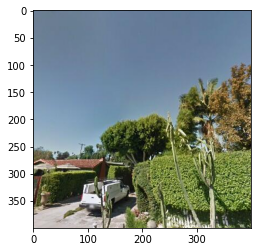

time: 700 ms (started: 2023-03-21 04:15:26 +00:00)


In [ ]:
# Viewing one of images shape.
img, label = dataset[2711]
print(f'Image size: {img.shape}')

# Preview one of the images..
def show_image(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1,2,0))

show_image(*dataset[2711])

In [ ]:
# Setting seed so that value won't change everytime. 
# Splitting the dataset to training, validation, and testing category.
torch.manual_seed(1710)
val_size = len(dataset)//20
test_size = len(dataset)//10
train_size = len(dataset) - val_size - test_size

# Random Splitting. 
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])

print(f'Train size: {len(train_ds)}, \n Validation size: {len(val_ds)}, \n Test size: {len(test_ds)}')

Train size: 41087, 
 Validation size: 2416, 
 Test size: 4833
time: 19.2 ms (started: 2023-03-21 04:15:27 +00:00)


In [ ]:
# ||||||||||||||||||      DATA LOADER CLASS      ||||||||||||||||||
class LoadDataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __getitem__(self, index):
        x = dataset[index][0]
        if self.transform:
            x = self.transform(dataset[index][0])
            
        y = dataset[index][1]
        return x, y
    
    def __len__(self):
        return len(dataset)


time: 1.04 ms (started: 2023-03-21 04:15:27 +00:00)


In [ ]:
## Loading data
train_ds = LoadDataset(train_ds, augment_transform)
val_ds = LoadDataset(val_ds, transform)
test_ds = LoadDataset(test_ds, transform)

batch_size = 32
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size, num_workers=2, pin_memory=True)

time: 2.81 ms (started: 2023-03-21 04:15:27 +00:00)


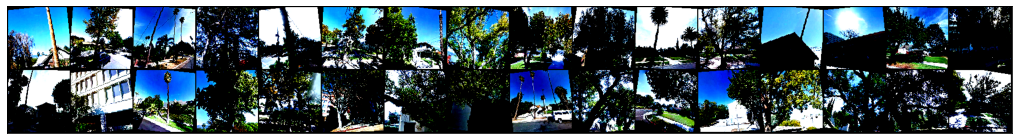

time: 23.9 s (started: 2023-03-21 04:15:27 +00:00)


In [ ]:
# Multiple images preview. 
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break

In [ ]:
device = get_default_device()
print(device)
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

cuda
time: 1.75 ms (started: 2023-03-21 04:15:51 +00:00)


In [ ]:
input_size = 3*112*112
output_size = CLS_CNT
num_classes = CLS_CNT

time: 624 µs (started: 2023-03-21 04:15:51 +00:00)


In [ ]:
type(classes)

list

time: 2.35 ms (started: 2023-03-21 04:15:51 +00:00)


In [ ]:
classes = dataset.classes
print(classes)
# np.save('classList.npy', np.array(classes))

['ALEPPO PINE', 'AMERICAN ARBORVITAE', 'AMERICAN SWEETGUM', 'APRICOT', 'ARIZONA ASH', 'ARIZONA CYPRESS', 'ATLAS CEDAR', 'AUSTRALIAN FLAME TREE', 'AUSTRALIAN WILLOW', 'AVOCADO', 'BLACK ACACIA', 'BLACK WALNUT', 'BLUE GUM', 'BOTTLE TREE', 'BOTTLEBRUSH', 'BOX ELDER', 'BRAZILIAN PEPPER', 'BRISBANE BOX', 'BRONZE LOQUAT', 'BRUSH CHERRY', 'CAJEPUT TREE', 'CALIFORNIA BAY', 'CALIFORNIA BLACK OAK', 'CALIFORNIA BUCKEYE', 'CALIFORNIA FAN PALM', 'CALIFORNIA PEPPER', 'CAMPHOR TREE', 'CANARY ISLAND DATE PALM', 'CANARY ISLAND PINE', 'CAROB', 'CAROLINA LAUREL CHERRY', 'CARROTWOOD', 'CHINABERRY', 'CHINESE ELM', 'CHINESE FLAME TREE', 'CHINESE FOUNTAIN PALM', 'CHINESE HACKBERRY', 'CHINESE JUNIPER', 'CHINESE PISTACHE', 'CHINESE TALLOW TREE', 'CHITALPA', 'COAST REDWOOD', 'CORK OAK', 'CRAPE MYRTLE', 'CROWN OF GOLD TREE', 'DATE PALM', 'DEODAR CEDAR', 'ENGLISH WALNUT', 'EVERGREEN PEAR', 'FERN PINE', 'FLOSS SILK TREE', 'FLOWERING PLUM', 'GLOSSY PRIVET', 'GOLD MEDALLION TREE', 'GUADALUPE PALM', 'HOLLY OAK', 'HOLL

## ResNet50 Training

In [ ]:
resnet50 = models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

time: 1.6 s (started: 2023-03-07 05:46:34 +00:00)


In [ ]:
# Freeze cnn blocks
for param in resnet50.parameters():
    param.requires_grad = False

time: 2.93 ms (started: 2023-03-07 05:46:36 +00:00)


In [ ]:
# Transfer learning - ResNet50
class TF_RESNET50(ImageClassificationBase):
    def __init__(self, classes, resnet=None):
        super().__init__()
        self.num_classes = classes
        self.features = nn.Sequential(*list(resnet.children())[:-1])
        num_ftrs = resnet.fc.in_features
        self.fc = nn.Linear(num_ftrs, self.num_classes)

    def forward(self,x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        return F.log_softmax(x, dim=1)

time: 6.32 ms (started: 2023-03-07 05:46:36 +00:00)


In [ ]:
# Model print
num_classes = CLS_CNT
model_resnet = TF_RESNET50(num_classes, resnet50)
model_resnet.to(device)

TF_RESNET50(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d

time: 79.3 ms (started: 2023-03-07 05:46:36 +00:00)


In [ ]:
history = []
num_epochs = 20
lr = 0.0001
opt_func = torch.optim.Adam(model_resnet.parameters())
cpDir = '/content/drive/MyDrive/Uni/Thesis/Repo/classification/streetview/checkpoints/ResNet50'

time: 3.73 ms (started: 2023-03-07 05:46:36 +00:00)


### Training e 0-> 4

In [ ]:
history += fit(num_epochs, lr, model_resnet, train_dl, val_dl, opt_func)

0it [00:00, ?it/s]

Epoch [0], train_loss: 2.7330, val_loss: 2.4546, val_acc: 0.6033


0it [00:00, ?it/s]

Epoch [1], train_loss: 2.4115, val_loss: 2.3463, val_acc: 0.6240


0it [00:00, ?it/s]

Epoch [2], train_loss: 2.3037, val_loss: 2.2894, val_acc: 0.6337


0it [00:00, ?it/s]

Epoch [3], train_loss: 2.2481, val_loss: 2.2115, val_acc: 0.6482


0it [00:00, ?it/s]

Epoch [4], train_loss: 2.2029, val_loss: 2.1476, val_acc: 0.6591


0it [00:00, ?it/s]

Epoch [5], train_loss: 2.1673, val_loss: 2.1069, val_acc: 0.6668


0it [00:00, ?it/s]

In [ ]:
start_epoch, temp_loss, temp_Hist = load_cp('best_weights.pth',model_resnet, opt_func)

time: 5.13 s (started: 2023-03-04 05:31:33 +00:00)


In [ ]:
history += continue_fit(num_epochs, lr, model_resnet, train_dl, val_dl, optFunc=opt_func, cpPath = cpDir, startEpoch = start_epoch)

  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [6], train_loss: 2.1251, val_loss: 2.0924, val_acc: 0.6703


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [7], train_loss: 2.1079, val_loss: 2.1099, val_acc: 0.6657


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [8], train_loss: 2.0845, val_loss: 2.1042, val_acc: 0.6672


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [9], train_loss: 2.0720, val_loss: 2.0638, val_acc: 0.6766


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [10], train_loss: 2.0552, val_loss: 2.0227, val_acc: 0.6831


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [11], train_loss: 2.0385, val_loss: 1.9995, val_acc: 0.6900


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [12], train_loss: 2.0511, val_loss: 2.0177, val_acc: 0.6855


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [13], train_loss: 2.0357, val_loss: 2.0108, val_acc: 0.6898


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [14], train_loss: 2.0204, val_loss: 1.9931, val_acc: 0.6931


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [15], train_loss: 2.0213, val_loss: 1.9683, val_acc: 0.6958


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [16], train_loss: 2.0058, val_loss: 1.9805, val_acc: 0.6949


  0%|          | 0/1511 [00:00<?, ?it/s]

### Continue training

In [ ]:
rn_cpt_15 = '/content/drive/MyDrive/Uni/Thesis/Repo/classification/streetview/checkpoints/CP_ResNet50_e15(233918Mar042023).pth'
start_epoch, temp_loss, temp_Hist = load_cp(rn_cpt_15, model_resnet, opt_func)

time: 9.76 s (started: 2023-03-04 22:32:27 +00:00)


In [ ]:
# Unfreeze features blocks
for param in model_resnet.features.parameters():
    param.requires_grad = True

time: 2.77 ms (started: 2023-03-04 22:32:37 +00:00)


In [ ]:
history += continue_fit(num_epochs, lr, model_resnet, train_dl, val_dl, optFunc=opt_func, cpPath = cpDir, startEpoch = start_epoch)

  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [16], train_loss: 1.4470, val_loss: 0.9650, val_acc: 0.8859


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [17], train_loss: 1.0462, val_loss: 0.7147, val_acc: 0.9261


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [18], train_loss: 0.8503, val_loss: 0.5763, val_acc: 0.9469


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [19], train_loss: 0.7046, val_loss: 0.4307, val_acc: 0.9668
time: 5h 37min 13s (started: 2023-03-04 22:32:37 +00:00)


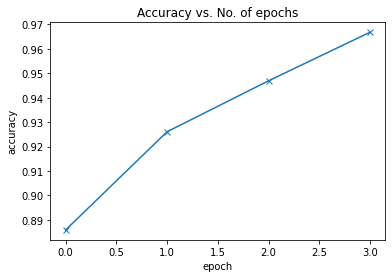

time: 402 ms (started: 2023-03-05 04:09:50 +00:00)


In [ ]:
plot_accuracies(history)

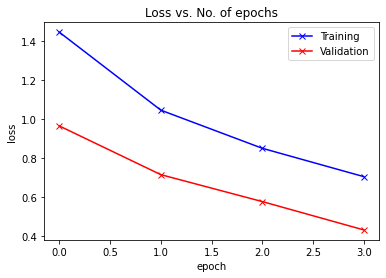

time: 289 ms (started: 2023-03-05 04:09:51 +00:00)


In [ ]:
plot_losses(history)

In [ ]:
evaluate(model_resnet, test_loader)

{'val_loss': 0.43069392442703247, 'val_acc': 0.9667645692825317}

time: 19min 50s (started: 2023-03-05 05:05:57 +00:00)


In [ ]:
!pwd

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
pwd: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
time: 280 ms (started: 2023-03-05 05:33:15 +00:00)


In [ ]:
cp_e19 = '/content/drive/MyDrive/Uni/Thesis/Repo/classification/streetview/checkpoints/ResNet50_CP_e19(143948Mar052023).pth'
start_epoch, temp_loss, temp_Hist = load_cp(cp_e19, model_resnet, opt_func)

time: 14 s (started: 2023-03-07 05:46:36 +00:00)


In [ ]:
# Save model weights
dest = '/content/drive/MyDrive/Uni/Thesis/Repo/classification/streetview/checkpoints/models/ResNet50_SV_CM(161527Mar072023).pt'
torch.save(model_resnet, dest)

time: 668 ms (started: 2023-03-07 05:46:50 +00:00)


In [ ]:
pwd

'/content/drive/MyDrive/Uni/Thesis/Repo/classification/streetview'

time: 11.7 ms (started: 2023-03-07 06:36:31 +00:00)


In [ ]:
type(dataset.classes)

list

time: 3.6 ms (started: 2023-03-07 06:34:48 +00:00)


In [ ]:
np.save('classList.npy',dataset.classes)

time: 6.87 ms (started: 2023-03-07 06:36:39 +00:00)


## EfficientNet

In [ ]:
efficientNet_B7 = models.efficientnet_b7(pretrained=True)

Downloading: "https://download.pytorch.org/models/efficientnet_b7_lukemelas-dcc49843.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b7_lukemelas-dcc49843.pth


  0%|          | 0.00/255M [00:00<?, ?B/s]

time: 3.68 s (started: 2023-03-21 04:18:10 +00:00)


In [ ]:
# Freeze cnn blocks
for param in efficientNet_B7.parameters():
    param.requires_grad = False

time: 3.84 ms (started: 2023-03-21 04:18:14 +00:00)


In [ ]:
class TF_EFFICIENT_NET(ImageClassificationBase):
    def __init__(self, classes, effnet):
        super().__init__()
        self.num_classes = classes
        self.features = effnet.features
        self.avgpool = effnet.avgpool
        num_ftrs = list(effnet.classifier.children())[1].in_features
        self.classifier = nn.Sequential(nn.Dropout(p=0.2, inplace=True), 
                                        nn.Linear(num_ftrs, self.num_classes))

    def forward(self, X):
        X = self.features(X)
        X = self.avgpool(X)
        X = X.view(X.size()[0], -1)
        X = self.classifier(X)
        
        return F.log_softmax(X, dim=1)

In [ ]:
# Model print
model_efficientNet_b7 = TF_EFFICIENT_NET(num_classes, efficientNet_B7)
model_efficientNet_b7.cuda()

TF_EFFICIENT_NET(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
            (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNor

time: 158 ms (started: 2023-03-21 04:18:19 +00:00)


In [ ]:
history = []
num_epochs = 15
lr = 0.0001
opt_func = torch.optim.Adam(model_efficientNet_b7.parameters())
cpDir = '/content/drive/MyDrive/Uni/Thesis/Repo/classification/streetview/checkpoints/EfficientNetB7'

time: 9.17 ms (started: 2023-03-21 04:18:23 +00:00)


### 0 to 5

In [ ]:
history += continue_fit(num_epochs, lr, model_efficientNet_b7, train_dl, val_dl, optFunc=opt_func, cpPath = cpDir, startEpoch = 0)

  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [0], train_loss: 3.2304, val_loss: 2.8640, val_acc: 0.5433


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [1], train_loss: 2.7538, val_loss: 2.6244, val_acc: 0.5697


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [2], train_loss: 2.6525, val_loss: 2.5198, val_acc: 0.5840


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [3], train_loss: 2.5948, val_loss: 2.4611, val_acc: 0.5901


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [4], train_loss: 2.5738, val_loss: 2.4252, val_acc: 0.5946


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [5], train_loss: 2.5640, val_loss: 2.4055, val_acc: 0.5959


  0%|          | 0/1511 [00:00<?, ?it/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-27-863bf7b88ab6>", line 1, in <module>
    history += continue_fit(num_epochs, lr, model_efficientNet_b7, train_dl, val_dl, optFunc=opt_func, cpPath = cpDir, startEpoch = 0)
  File "/content/drive/MyDrive/Uni/Thesis/Repo/classification/streetview/pyTorchTraining.py", line 261, in continue_fit
  File "/usr/local/lib/python3.8/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "/content/drive/MyDrive/Uni/Thesis/Repo/classification/streetview/pyTorchTraining.py", line 206, in evaluate
  File "/content/drive/MyDrive/Uni/Thesis/Repo/classification/streetview/pyTorchTraining.py", line 206, in <listcomp>
  File "/content/drive/MyDrive/Uni/Thesis/Repo/classification/streetview/pyTorchTraining.py", line 191, in __iter__


FileNotFoundError: ignored

time: 9h 48min 29s (started: 2023-03-08 10:05:21 +00:00)


### 5 to 10

In [ ]:
history += continue_fit(num_epochs, lr, model_efficientNet_b7, train_dl, val_dl, optFunc=opt_func, cpPath = cpDir, startEpoch = start_epoch)

  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [6], train_loss: 2.4019, val_loss: 2.4013, val_acc: 0.5969


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [7], train_loss: 2.3874, val_loss: 2.3867, val_acc: 0.5962


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [8], train_loss: 2.3929, val_loss: 2.3792, val_acc: 0.5991


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [9], train_loss: 2.3816, val_loss: 2.3728, val_acc: 0.5992
time: 3h 54min 56s (started: 2023-03-08 22:56:51 +00:00)


## 10 to 15

In [ ]:
en_cpt_9 = '/content/drive/MyDrive/Uni/Thesis/Repo/classification/streetview/checkpoints/EfficientNetB7_CP_e9(132147Mar092023).pth'
start_epoch, temp_loss, temp_Hist = load_cp(en_cpt_9, model_efficientNet_b7, opt_func)

time: 976 ms (started: 2023-03-09 02:57:44 +00:00)


In [ ]:
num_epochs

15

time: 2.63 ms (started: 2023-03-09 02:58:41 +00:00)


In [ ]:
history += continue_fit(num_epochs, lr, model_efficientNet_b7, train_dl, val_dl, optFunc=opt_func, cpPath = cpDir, startEpoch = start_epoch)

  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [10], train_loss: 2.3871, val_loss: 2.3662, val_acc: 0.6005


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [11], train_loss: 2.3994, val_loss: 2.3654, val_acc: 0.6003


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [12], train_loss: 2.5452, val_loss: 2.3515, val_acc: 0.6009


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [13], train_loss: 2.5332, val_loss: 2.3459, val_acc: 0.6015


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [14], train_loss: 2.5296, val_loss: 2.3337, val_acc: 0.6044
time: 3h 26min 17s (started: 2023-03-09 02:59:32 +00:00)


## Unfreeze params | 15 -> 20

In [ ]:
# Freeze cnn blocks
for param in model_efficientNet_b7.parameters():
    param.requires_grad = True

time: 17.8 ms (started: 2023-03-09 07:40:10 +00:00)


In [ ]:
history += continue_fit(20, lr, model_efficientNet_b7, train_dl, val_dl, optFunc=opt_func, cpPath = cpDir, startEpoch = 15)

  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [15], train_loss: 1.6823, val_loss: 1.2618, val_acc: 0.8380


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [16], train_loss: 1.2466, val_loss: 0.9976, val_acc: 0.8842


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [17], train_loss: 1.0656, val_loss: 0.8955, val_acc: 0.8978


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [18], train_loss: 0.9392, val_loss: 0.6997, val_acc: 0.9299


  0%|          | 0/1511 [00:00<?, ?it/s]

Epoch [19], train_loss: 0.8232, val_loss: 0.7263, val_acc: 0.9290
time: 3h 43min 5s (started: 2023-03-09 07:41:49 +00:00)


In [ ]:
evaluate(model_efficientNet_b7, test_loader)

{'val_loss': 0.7263157963752747, 'val_acc': 0.9289791584014893}

time: 19min 45s (started: 2023-03-09 12:04:10 +00:00)


In [ ]:
cp_e15 = '/content/drive/MyDrive/Uni/Thesis/Repo/classification/streetview/checkpoints/EfficientNetB7_CP_e15(185651Mar092023).pth'
start_epoch, temp_loss, temp_Hist = load_cp(cp_e15, model_efficientNet_b7, opt_func)

time: 5.21 s (started: 2023-03-09 13:13:14 +00:00)


In [ ]:
# Save model weights
dest = '/content/drive/MyDrive/Uni/Thesis/Repo/classification/streetview/checkpoints/models/EfficientNetB7_SV_CMe15(235017Mar092023).pt'
torch.save(model_efficientNet_b7, dest)

time: 1.3 s (started: 2023-03-09 13:14:29 +00:00)


### Testing

In [ ]:
cp_e14 = '/content/drive/MyDrive/Uni/Thesis/Repo/classification/streetview/checkpoints/EfficientNetB7_CP_e14(165548Mar092023).pth'
start_epoch, temp_loss, temp_Hist = load_cp(cp_e14, model_efficientNet_b7, opt_func)
model = model_efficientNet_b7

time: 2.97 s (started: 2023-03-21 04:18:29 +00:00)


In [ ]:
evaluate(model, test_loader)

{'val_loss': 2.3336923122406006, 'val_acc': 0.6043803691864014}

time: 2h 9min 2s (started: 2023-03-21 04:18:57 +00:00)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CBCLoss(nn.Module):
    def __init__(self, beta=0.9999):
        super(CBCLoss, self).__init__()
        self.beta = beta

    def forward(self, output, target):
        # Compute the frequency of each class in the batch
        class_count = torch.bincount(target)
        class_freq = class_count.float() / len(target)

        # Compute the weight of each class based on its frequency
        class_weight = (1 - self.beta) / (1 - torch.pow(self.beta, class_freq))
        class_weight = class_weight / torch.sum(class_weight)

        # Compute the contrastive loss
        pos_mask = torch.zeros_like(output)
        neg_mask = torch.ones_like(output)
        for i in range(len(target)):
            pos_mask[i, target[i]] = 1
            neg_mask[i, target[i]] = 0
        pos_dist = torch.sum(torch.pow(output - pos_mask, 2), dim=1)
        neg_dist = torch.sum(torch.pow(output - neg_mask, 2), dim=1)
        loss = class_weight[target] * pos_dist + (1 - class_weight[target]) * torch.relu(1 - neg_dist)
        loss = torch.mean(loss)

        return loss